<a href="https://colab.research.google.com/github/PriyankaSejwal/Hotel-Booking-Analysis/blob/main/Priyanka_Rimo_CapstoneProject_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
# Mounting the drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing necessary libraries to be used in the project

# libraries to load the dataset and to perfrom analysis on the dataset
import pandas as pd
import numpy as np

# libraries for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# library to avoid the occurance of warnings in the output
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the dataset from the drive

data = pd.read_csv('/content/drive/MyDrive/data file alma better/Capstone Projects/Hotel Bookings.csv')

In [4]:
# checking the first five observations of the dataset with head() method

data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
# checking the last five observations using tail() method.

data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [6]:
# checking the shape of the dataset

data.shape

(119390, 32)

Hotel Booking Analysis dataset has a huge number of observations. We have a whopping 1 lakh 19 thousand 3 hundred ninteen observations that are spread across 32 different features.

In [7]:
# Checking the columns of the dataset

data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

<b>Column description:</b>
1. 'hotel' - A categorical feature having two categories 'Resort Hotel'  or 'City Hotel'.
2. 'is_canceled' - Feature containing information whether the booking was canceled(1) or not(0).
3. 'lead_time'- Lead time is the number of dates passed between the entering date of the booking and the arrival date.
4. 'arrival_date_year'- year of the arrival date
5. 'arrival_date_month'-  month of arrival.
6. 'arrival_date_week_number' - week number for the arrival date, ranges between 1-52.
7. 'arrival_date_day_of_month'- day of arrival date, ranges between 1-31.
8. 'stays_in_weekend_nights'- number of weekend nights that the guest stayed in for or have made booking for. 
9. 'stays_in_week_nights'- Number of week nights ( Mon-Fri) that the guest stayed in for or booked for.
10. 'adults'- number of adults
11. 'children'- Numer of children accompanied.
12. 'babies'- Number of babies 
13. 'meal'- Type of meal booked. A categorical feature in which 
* undefined means no meal booked.
* BB - Bed and breakfast.
* HB - Half Board ( Breakfast + one other meal)
* FB - Full Board ( Breakfast, lunch and dinner)
14. 'country'- Country of origin. 
15. 'market_segment' - Booking made through which market segment. A categorical variable containing categories - 
*   TA -  through travel agent
*   TO - through tour operator
16. 'distribution_channel' - The different booking distribution channels
* TA - Travel Agent
* TO- Tour operator
17. 'is_repeated_guest'- value indicating whether the booking name was from list of previous guests(1) or not(0).
18. 'previous_cancellations'- Number of previous bookings that were cancelled by the customer prior to the current booking.
19. 'previous_bookings_not_canceled'- Number of previous bookings not cancelled by the customer prior to the current booking.
20. 'reserved_room_type' - A categorical variable either A,D or E, consisting information on room type. 
21. 'assigned_room_type'- Category of room type assigned to the  booking. Sometimes room type booked differs from room type assigned due to the unavailability of the room type booked. 
22. 'booking_changes'- Number of amendments made to the booking. 
23. 'deposit_type'- whether a customer has made any deposit to confirm the booking. A categorical variable assumes three categories- 
No deposit- no deposit was made, 
Non-refundable- a deposit was made in the value of the total stay cost.
Refundable- a deposit was made with a value under the total cost of stay.
24. 'agent'- ID of the travel agency that made the booking.
25. 'company'- ID of the company responsible for the making the booking or the payment. A categorical variable almost 94% of the values are missing.
25. 'days_in_waiting_list'- Number of days the booking was in waiting list till the booking was confirmed to the customer.
26. 'customer_type'- Type of booking, it assumes one of the four categories.
* Contract - when the booking has an allotment or other type of contract associated to it
* Group- when the booking is a part of a group.
* Transient – when the booking is not part of a group or contract, and is not associated to other transient booking
* Transient-party – when the booking is transient, but is associated to at least other transient booking
27. 'adr'- Average Daily Rate is defined by dividing the sum of all lodging transactions by the total number of staying nights.
28. 'required_car_parking_spaces'- Number of car parking spaces required by the customer.
29. 'total_of_special_requests'- Number of special requests made by the customer.
30. 'reservation_status' - Reservation's last status, a categorical variable assuming one of the three categories: 
* Canceled – booking was canceled by the customer
* Check-Out – customer has checked in but already departed
* No-Show – customer did not check-in and did inform the hotel of the reason why  
31. 'reservation_status_date' - Date at which the last reservation status was set.

In [8]:
# Renaming the column adr to Average Daily Rate for simplicity

data.rename(columns={'adr':'average_daily_rate'}, inplace = True)

# checking the changed feature name
data.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [9]:
# checking some basic information about different features of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

<b> Observations :
1. The columns of the dataset are of heterogeneous datatypes. Columns are either object, integer or float type.
2. Also we can see observe that a few columns have missing values. We need to deal with them as we proceed in the project. 
3. The float type columns are - children, company, agent and adr. Out of these four, columns- 

  a. children - contains information of the number of children along.

  b. company - might be the company code.

  c. agent - might contain the information about the agent code.

Due to the presence of null-values in these columns the datatype is float as float datatype supports the storage of NaN as a value. While dealing with the null-values of these columns, we will also change their datatypes to integer for simplicity. 


In [10]:
# checking the missing-values in the dataset.
# displaying the percentage of missing values in the columns.

data.isnull().sum()[data.isnull().sum()!=0]/len(data)*100

children     0.003350
country      0.408744
agent       13.686238
company     94.306893
dtype: float64

<b> Observations </b>
1. Feature company has 94% of records as missing records.
2. Feature agent, country and children too have missing records.

In [11]:
# Let's drop the column company which has almost 95% of the observations as missing.

data.drop('company', axis=1, inplace=True)

#checking if the column has been dropped successfully or not.
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [12]:
# Looking at the number of unique values in the column - agent.
data['agent'].nunique()

333

In [13]:
# Agent column has around 14% of the values as missing. Dropping 14% of data is not a good practice. Agent column is a numeric column with 333 unique entries.
# Replacing the missing values for column - agent with 0.

data['agent'].fillna(0, inplace = True)

In [14]:
# column - children too have missing values.
# children column is a numeric column 
# we will replace the null values with the median value as replacing with mean might end up giving us a floating value and count of children cannot be in decimals.

data['children'].fillna(data['children'].median(), inplace = True)

In [15]:
# Lastly column - country which is a categorical column having country names.
# We have a few missing values in this column too.
# Replacing the missing vaLUES with highest occuring values.

data['country'].fillna(data['country'].mode()[0], inplace = True)

In [16]:
# checking for any missing values, if exists anymore

data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
average_daily_rate                0
required_car_parking_spaces 

In [17]:
# Converting the datatype of the columns - children which is the count of children and agent which is ID of the travel agency.
# Both these columns are of float data type. Let's convert them to integer datatype for simplicity.

data = data.astype({'agent' : 'int', 'children' : 'int'})

In [18]:
# checking the statistical summary of the data

data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,average_daily_rate,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


<b> Observation : </b>
1. The feature average_daily_rate have minimum value to be negative which is  not possible as average rate can not be negative.
2. The average cancelations are 37.04% and it deviates by 48.29% indicating lots of variations between cancelation.
3. looking at the special request column, we found that around 75% of the customers asked for one special request.

In [19]:
# looking at the observations corresponding to the negative average daily rate
data[data['average_daily_rate']<0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,0,0,BB,GBR,Groups,Direct,1,0,2,A,H,2,No Deposit,273,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15


In [20]:
# as there is only one record we can drop the record.
data.drop(data[data['average_daily_rate']<0].index, inplace=True)

In [21]:
# checking for the shape of the dataset
data.shape

(119389, 31)

# <b>Data Visualization

In [22]:
# looking at the hotel column first.
# Finding out the unique categories.

data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

City Hotel      79330
Resort Hotel    40059
Name: hotel, dtype: int64


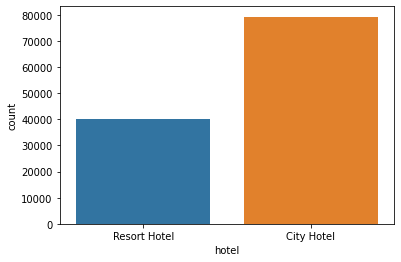

In [23]:
# Lets look at the count of observations belonging to city hotel v/s resort hotel

print(data['hotel'].value_counts())
sns.countplot(data['hotel'])

<b> Observation: 

City hotel are more in records than resort hotels this might be due to the one or more of the following reasons:
* City hotels might be cheaper than resort hotels.
* City Hotels are more than the resort hotels.
* Customers preference for city hotels over resort hotels.

Question: Which year city hotel has the most booking?

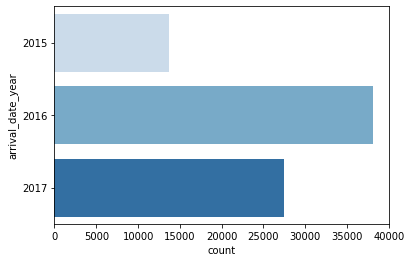

In [38]:
# As city hotel in most booked lets deep dive into the year in which it was booked the highest.

#saving the observations for city hotel in another variable
city_hotel_data = data[data['hotel']=='City Hotel']

#visualizing the booking in different years for city hotel.
sns.countplot(y= 'arrival_date_year', data = city_hotel_data, palette='Blues')

# <b><i> Observation:</b></i>

<b> Year 2016 can see most booking for city hotel followed by 2017 and 2015.




### <b>Question:  Which month sees the most booking in the year 2016 for city hotel?

In [49]:
df_city_2016 = city_hotel_data.loc[city_hotel_data['arrival_date_year']==2016,'arrival_date_month'].value_counts().reset_index().rename(columns = {'index':'Months', 'arrival_date_month':'Number of bookings'})

#creating a column which will help us sort the data according to the months in th eorder from january to december.
df_city_2016['map_month']=df_city_2016['Months']
mapping={'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}

# changing the column map_month by applying mapping.
df_city_2016['map_month']=df_city_2016['map_month'].map(mapping)

#Now sorting the data according to the months name
df_city_2016.sort_values(by='map_month', inplace=True)

#Having a look at the created dataframe
df_city_2016

,Months,Number of bookings,map_month
11,January,1364,1
10,February,2371,2
8,March,3046,3
4,April,3561,4
3,May,3676,5
1,June,3923,6
6,July,3131,7
5,August,3378,8
2,September,3871,9
0,October,4219,10


Text(0.5, 1.0, 'Number of bookings made for City Hotel in different months for the year 2016')

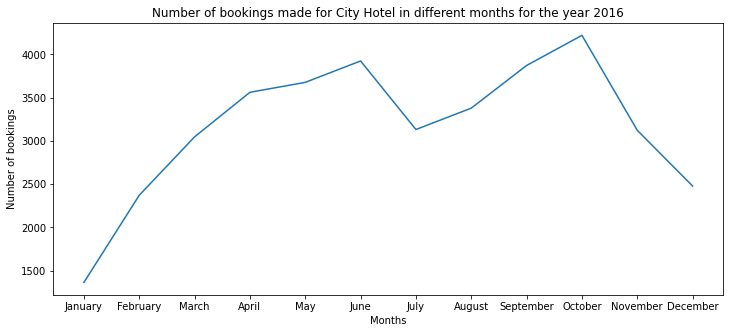

In [53]:
# Visualizing the month and number of booking column from the above dataframe
# We will use lineplot to see the trend in booking across the different months for city hotel in the year 2016.

plt.figure(figsize=(12,5))
sns.lineplot(y= 'Number of bookings', x='Months', data=df_city_2016, palette='Reds')
plt.title('Number of bookings made for City Hotel in different months for the year 2016')

# <b> Observation: </b>

The spike in booking can be seen in june and october for the city hotel in 2016.

<b> Preferred Month to Book a City Hotel:</b>

October is the most preferred month for booking by the customer.

In [36]:
# Anlyzing the hotel type with the cancelation  rate to see which of the two- city hotel or resort hotel gets cancelled frequently

hotel_canceled = data.loc[data['is_canceled']==0,'hotel'].value_counts(normalize=True)
hotel_canceled

City Hotel      0.61502
Resort Hotel    0.38498
Name: hotel, dtype: float64

# <b> Turning to see the booking trend for both the hotels monthwise

In [54]:
# Separating data for hotel and month in a separate dataframe for simplicity. 
df_hotels_month = data[['hotel','arrival_date_month']]
df_hotels_month.head()

,hotel,arrival_date_month
0,Resort Hotel,July
1,Resort Hotel,July
2,Resort Hotel,July
3,Resort Hotel,July
4,Resort Hotel,July


In [85]:
df_hotels_month.groupby(['hotel','arrival_date_month'])['arrival_date_month'].count()

hotel         arrival_date_month
City Hotel    April                 7480
              August                8983
              December              4132
              February              4965
              January               3736
              July                  8088
              June                  7894
              March                 6458
              May                   8232
              November              4357
              October               7605
              September             7400
Resort Hotel  April                 3609
              August                4894
              December              2648
              February              3103
              January               2193
              July                  4573
              June                  3045
              March                 3335
              May                   3559
              November              2437
              October               3555
              September 

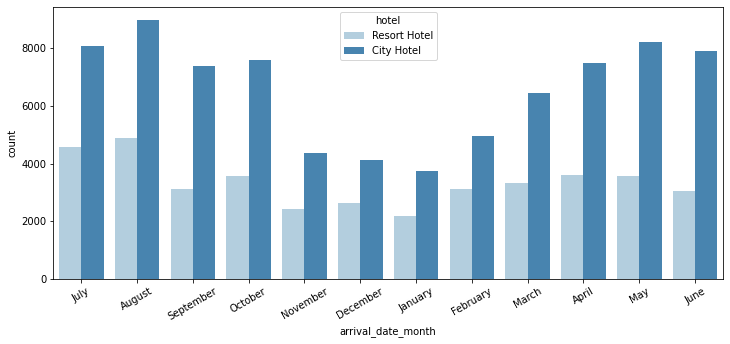

In [87]:
# visualizing the booking made for resort and city hotel over different months to see which month is preferable by customers to book a a resort or city hotel.

plt.figure(figsize=(12,5))
plt.xticks(rotation=30)
sns.countplot(x='arrival_date_month', hue='hotel', data=df_hotels_month, palette='Blues')

# <b> Observation: </b>
Over the years, August month has seen the most bookings for both City hotel and resort hotel.
January has seen the least number of bookings for both the hotel types.

# <b>Conclusion: </b>
August is the preferred month by customers. 

There might be several reasons for this trend: Holidays, Good season, Lower Rates etc.

Text(0, 0.5, 'Cancelation count')

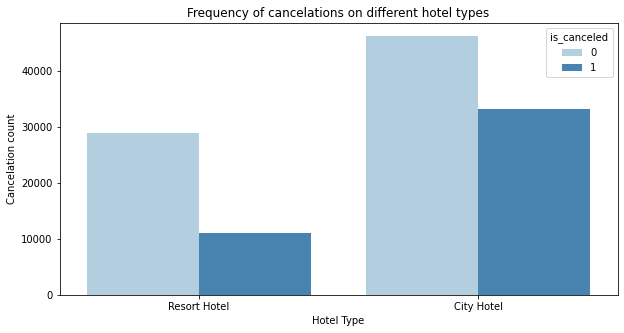

In [25]:
# Having a look at the cancelation frequency based on different hotel type.

plt.figure(figsize=(10,5))
sns.countplot(x= data['hotel'], hue=data['is_canceled'], palette='Blues')
plt.title('Frequency of cancelations on different hotel types')
plt.xlabel('Hotel Type')
plt.ylabel('Cancelation count')

<b> Observation: </b>
A higher cancelations seen in city hotels cannot give us any information since the number of city hotels are booked more than resort hotels.

In [26]:
# Looking at the information of cancelation based on hotel type

data.groupby('hotel')['is_canceled'].value_counts()

hotel         is_canceled
City Hotel    0              46228
              1              33102
Resort Hotel  0              28937
              1              11122
Name: is_canceled, dtype: int64

In [27]:
# lets look at the leading time
data['lead_time'].unique()

array([342, 737,   7,  13,  14,   0,   9,  85,  75,  23,  35,  68,  18,
        37,  12,  72, 127,  78,  48,  60,  77,  99, 118,  95,  96,  69,
        45,  40,  15,  36,  43,  70,  16, 107,  47, 113,  90,  50,  93,
        76,   3,   1,  10,   5,  17,  51,  71,  63,  62, 101,   2,  81,
       368, 364, 324,  79,  21, 109, 102,   4,  98,  92,  26,  73, 115,
        86,  52,  29,  30,  33,  32,   8, 100,  44,  80,  97,  64,  39,
        34,  27,  82,  94, 110, 111,  84,  66, 104,  28, 258, 112,  65,
        67,  55,  88,  54, 292,  83, 105, 280, 394,  24, 103, 366, 249,
        22,  91,  11, 108, 106,  31,  87,  41, 304, 117,  59,  53,  58,
       116,  42, 321,  38,  56,  49, 317,   6,  57,  19,  25, 315, 123,
        46,  89,  61, 312, 299, 130,  74, 298, 119,  20, 286, 136, 129,
       124, 327, 131, 460, 140, 114, 139, 122, 137, 126, 120, 128, 135,
       150, 143, 151, 132, 125, 157, 147, 138, 156, 164, 346, 159, 160,
       161, 333, 381, 149, 154, 297, 163, 314, 155, 323, 340, 35